# Carga de Librerías

In [55]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
from sklearn.linear_model import LinearRegression
from datetime import datetime, date
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_friedman1
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVC, LinearSVR

# Lectura de Base de Datos

In [56]:
Base = pd.read_csv("/Volumes/TOSHIBA EXT/development/dgef-data-science/exercises/final_project/data/google-stock-price/base-final-regresion.csv",dtype='str',encoding = "ISO-8859-1")
B=Base[Base.columns[1:7]]

In [57]:
B["date"] = pd.to_datetime(B["date"],dayfirst=True)
B["close"] = B["close"].astype(float)
B["high"] = B["high"].astype(float)
B["low"] = B["low"].astype(float)
B["open"] = B["open"].astype(float)
B["volume"] = B["volume"].astype(int)
B.head()

,date,close,high,low,open,volume
0,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733
1,2021-06-11 00:00:00+00:00,2513.93,2526.990,2498.2900,2524.92,1262309
2,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337
3,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253
4,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453


In [58]:
B.shape

(1258, 6)

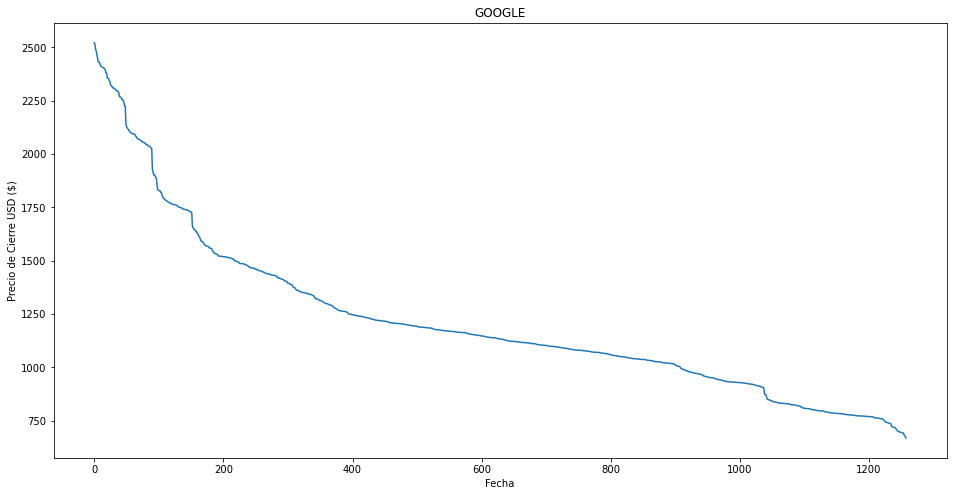

In [59]:
plt.figure(figsize=(16,8))
plt.title('GOOGLE')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre USD ($)')
plt.plot(B['close'])
plt.show()

# Definición de datos a predecir

In [60]:
df= B[['close']]

In [61]:
pronosticos = 25
df['prediccion'] = df[['close']].shift(-pronosticos)
df.tail(27)

,close,prediccion
1231,738.42,675.22
1232,736.96,668.26
1233,736.08,NaN
1234,733.78,NaN
1235,720.95,NaN
1236,720.64,NaN
1237,719.85,NaN
1238,718.92,NaN
1239,718.27,NaN
1240,716.98,NaN


# Definición de Variables Independiente y Dependiente

In [62]:
X = np.array(df.drop(['prediccion'],1))[:-pronosticos]
print(X)

[[2521.6 ]
 [2513.93]
 [2491.4 ]
 ...
 [ 738.63]
 [ 738.42]
 [ 736.96]]


In [63]:
y = np.array(df['prediccion'])[:-pronosticos]
print(y)

[2326.74 2321.41 2316.16 ...  680.04  675.22  668.26]


# Entrenamiento

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Regresiones

In [65]:
tree = DecisionTreeRegressor().fit(X_train,y_train)
lr = LinearRegression().fit(X_train,y_train)
redneu = MLPRegressor().fit(X_train,y_train)
svm =  LinearSVR().fit(X_train,y_train)

# Separación de Base de Datos a Predecir

In [66]:
X_futura = df.drop(['prediccion'],1)[:-pronosticos]
X_futura = X_futura.tail(pronosticos)
X_futura = np.array(X_futura)
X_futura 

array([[764.48],
       [762.56],
       [762.52],
       [762.49],
       [762.13],
       [762.02],
       [761.68],
       [760.99],
       [760.54],
       [759.69],
       [759.66],
       [759.11],
       [758.49],
       [758.04],
       [754.02],
       [750.5 ],
       [747.92],
       [745.91],
       [742.74],
       [741.77],
       [741.19],
       [739.77],
       [738.63],
       [738.42],
       [736.96]])

# Predicciones

In [67]:
tree_prediccion = tree.predict(X_futura)
print(tree_prediccion)
print()

[736.08 733.78 720.95 720.64 719.85 719.85 718.27 716.98 715.09 710.36
 705.63 701.87 701.87 701.87 697.46 695.94 695.36 694.49 693.71 692.1
 692.1  684.11 680.04 675.22 668.26]



In [68]:
lr_prediccion = lr.predict(X_futura)
print(lr_prediccion)
print()

[772.59706512 770.85657847 770.82031833 770.79312323 770.46678198
 770.3670666  770.05885542 769.43336803 769.02544147 768.25491352
 768.22771842 767.72914151 767.16710937 766.75918281 763.11503888
 759.92414668 757.58536774 755.76329578 752.88967979 752.01037143
 751.48459942 750.1973645  749.16395055 748.97358482 747.65008976]



In [69]:
redneu_prediccion = redneu.predict(X_futura)
print(redneu_prediccion)
print()

[738.47457507 736.6219212  736.58332424 736.55437652 736.20700392
 736.1008623  735.77278817 735.10699069 734.67277493 733.85258962
 733.82364191 733.29293377 732.69468095 732.2604652  728.38147115
 724.98493905 722.49543541 720.55593838 717.49712964 716.56115346
 716.00149761 714.63130568 713.53129244 713.32865842 711.91986954]



In [70]:
svm_prediccion = redneu.predict(X_futura)
print(svm_prediccion)
print()

[738.47457507 736.6219212  736.58332424 736.55437652 736.20700392
 736.1008623  735.77278817 735.10699069 734.67277493 733.85258962
 733.82364191 733.29293377 732.69468095 732.2604652  728.38147115
 724.98493905 722.49543541 720.55593838 717.49712964 716.56115346
 716.00149761 714.63130568 713.53129244 713.32865842 711.91986954]



# Gráficas

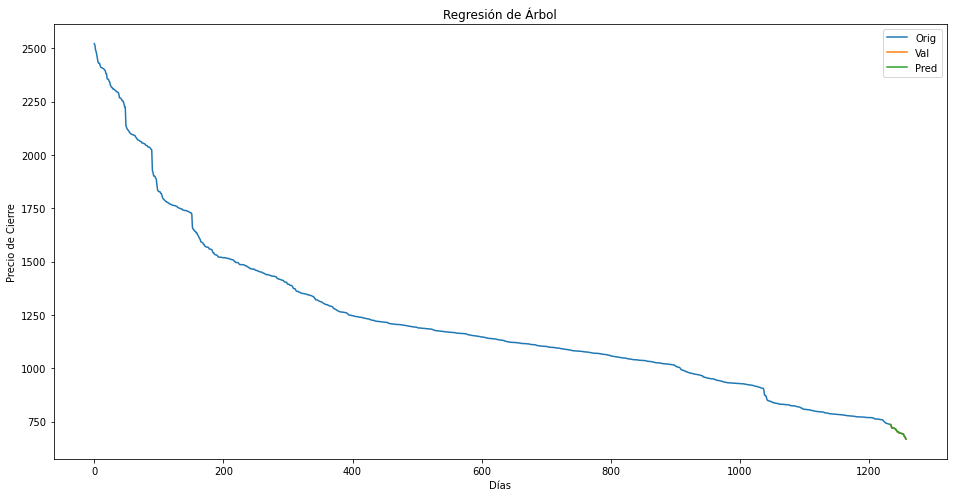

In [71]:
predicciones = tree_prediccion

valid =df[X.shape[0]:]
valid ['predicciones'] = predicciones
plt.figure(figsize=(16,8))
plt.title('Regresión de Árbol')
plt.xlabel('Días')
plt.ylabel('Precio de Cierre')
plt.plot(df['close'])
plt.plot(valid[['close','predicciones']])
plt.legend(['Orig', 'Val','Pred'])
plt.show()

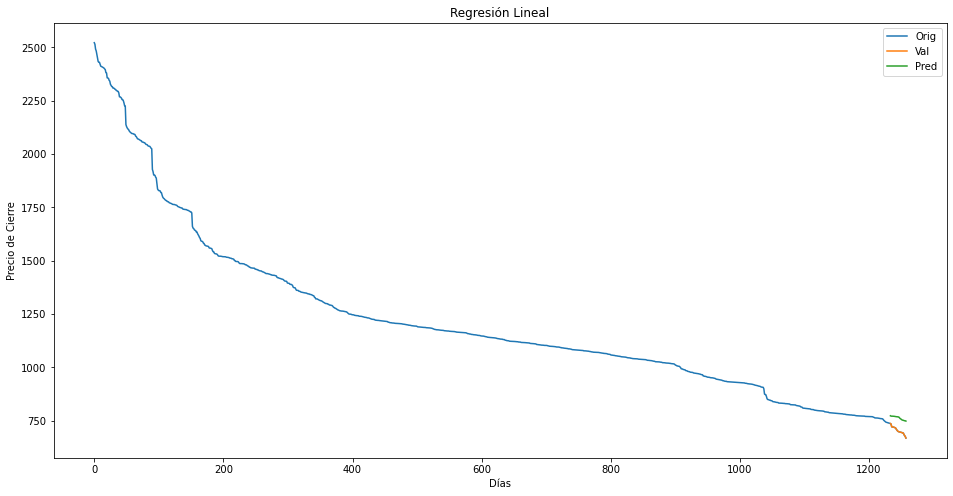

In [72]:
predicciones = lr_prediccion

valid =df[X.shape[0]:]
valid ['predicciones'] = predicciones
plt.figure(figsize=(16,8))
plt.title('Regresión Lineal')
plt.xlabel('Días')
plt.ylabel('Precio de Cierre')
plt.plot(df['close'])
plt.plot(valid[['close','predicciones']])
plt.legend(['Orig', 'Val','Pred'])
plt.show()

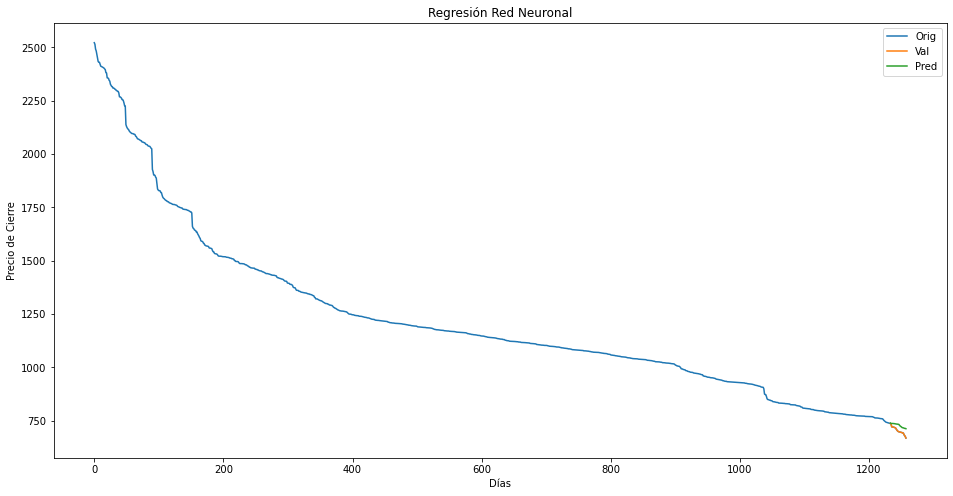

In [73]:
predicciones = redneu_prediccion

valid =df[X.shape[0]:]
valid ['predicciones'] = predicciones
plt.figure(figsize=(16,8))
plt.title('Regresión Red Neuronal')
plt.xlabel('Días')
plt.ylabel('Precio de Cierre')
plt.plot(df['close'])
plt.plot(valid[['close','predicciones']])
plt.legend(['Orig', 'Val','Pred'])
plt.show()

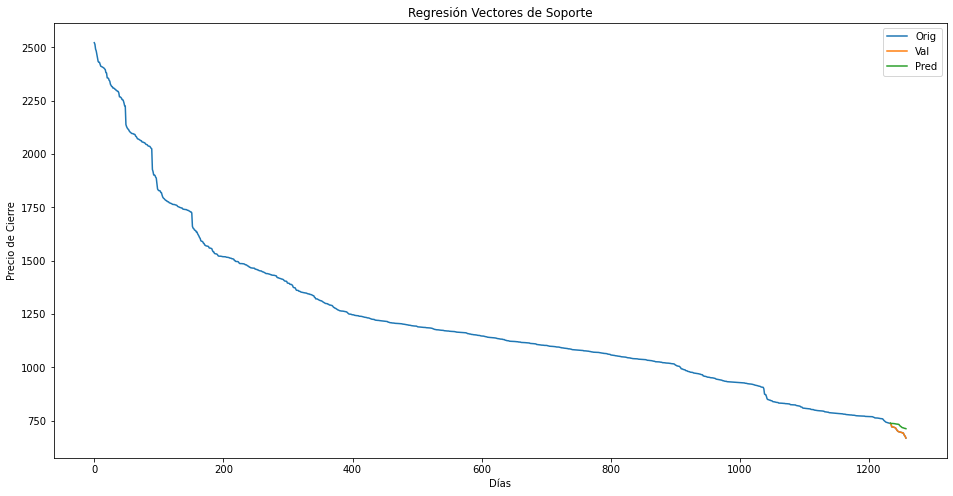

In [74]:
predicciones = svm_prediccion

valid =B[X.shape[0]:]
valid ['predicciones'] = predicciones
plt.figure(figsize=(16,8))
plt.title('Regresión Vectores de Soporte')
plt.xlabel('Días')
plt.ylabel('Precio de Cierre')
plt.plot(B['close'])
plt.plot(valid[['close','predicciones']])
plt.legend(['Orig', 'Val','Pred'])
plt.show()

In [75]:
#Con base en las gráficas la mejor regresión para esta base se logra con la Regresión de Árbol-